# 1.Tổng quan bài toán

Sự hài lòng của khách hàng là thước đo thành công hàng đầu đối với bất kỳ nâng hàng nào. Khách hàng không hài lòng thì sẽ không ở lại. Hơn nữa, những khách hàng không hài lòng hiếm khi nói lên sự không hài lòng của họ trước khi rời đi. Đó là vấn đề mà ngân hàng Santander đang yêu cầu mọi người giúp họ giải quyết bằng cách xác định sớm những khách hàng không hài lòng trong mối quan hệ giữa khách hàng và ngân hàng. Làm như vậy sẽ cho phép Santander thực hiện các bước chủ động để cải thiện sớm sự hài lòng của khách hàng trước khi quá muộn.


Nguồn dữ liệu: [**source**](https://www.kaggle.com/c/santander-customer-satisfaction/overview)

## 1.1 Load các package cần thiết

- Bước đầu tiên trong việc xây dựng mô hình là load các thư viện cần thiết.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 1.2 Load tập dữ liệu

- Bước tiếp theo là load tập dữ liệu.

In [2]:
train = pd.read_csv('../Dataset/train.csv')
test = pd.read_csv('../Dataset/test.csv')

In [3]:
test_id = test['ID']

# 2.Khai phá dữ liệu

- Bây giờ, đã đến lúc khám phá dữ liệu để hiểu rõ hơn về nó.

## 2.1 Tổng quan dữ liệu

- Chúng ta sẽ loại bỏ đặc trưng **'ID'** bởi vì đặc trưng này không mang bất kỳ ý nghĩa nào trong việc xây dựng mô hình

In [4]:
## Requirement 1:
## PUT YOUR CODE HERE:

train.drop('ID', axis=1, inplace = True)
test.drop('ID', axis=1, inplace = True)

In [5]:
## Requirement 2:
## PUT YOUR CODE HERE:

train.shape, test.shape

((76020, 370), (75818, 369))

- Chúng ta có thể thấy ở dự án này thì số lượng đặc trưng cần phải xử lý khá lớn, có tổng cộng 369 đặc trưng ở 2 tập dữ liệu dùng để huấn luyện và kiểm tra. Đặc trưng còn lại là **TARGET**, cũng chính là biến mục tiêu của chúng ta

In [6]:
train

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [7]:
test

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


- In ra tên của các đặc trưng

In [8]:
## Requirement 3:
## PUT YOUR CODE HERE:

col_names = train.columns

col_names

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=370)

- Lần này tên của các đặc trưng đã được giấu kín, việc này rất thường gặp khi tham gia các cuộc thi hoặc làm các dự án lớn trong trường hợp chủ nguồn dữ liệu không muốn tiết lộ thông tin.

- Xem tóm tắt một số đặc điểm về tập dữ liệu.

In [9]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 370 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    var3                           76020 non-null  int64  
 1    var15                          76020 non-null  int64  
 2    imp_ent_var16_ult1             76020 non-null  float64
 3    imp_op_var39_comer_ult1        76020 non-null  float64
 4    imp_op_var39_comer_ult3        76020 non-null  float64
 5    imp_op_var40_comer_ult1        76020 non-null  float64
 6    imp_op_var40_comer_ult3        76020 non-null  float64
 7    imp_op_var40_efect_ult1        76020 non-null  float64
 8    imp_op_var40_efect_ult3        76020 non-null  float64
 9    imp_op_var40_ult1              76020 non-null  float64
 10   imp_op_var41_comer_ult1        76020 non-null  float64
 11   imp_op_var41_comer_ult3        76020 non-null  float64
 12   imp_op_var41_efect_ult1       

**Bình luận**

- Như chúng ta đã thấy, lần này các đặc trưng của chúng ta chỉ có một định dạng duy nhất là định dạng số. Nên chúng ta sẽ đi sâu hơn về các kỹ thuật xử lý đặc trưng dạng số.

- Biến giá trị số có kiểu dữ liệu 'float64' và 'int64'.

- Không có giá trị khuyết tồn tại trong tập dữ liệu.

## 2.2 Phân tích biến mục tiêu

Do đặc trưng chúng ta muốn dự đoán là **TARGET** nên chúng ta sẽ tiến hành phân tích kỹ hơn về đặc trưng này

- Kểm tra số lượng nhãn của đặc trưng

In [10]:
## Requirement 4:
## PUT YOUR CODE HERE:

train["TARGET"].nunique()

2

In [11]:
## Requirement 5:
## PUT YOUR CODE HERE:

train["TARGET"].unique()

array([0, 1], dtype=int64)

- Xem phân phối tần suất của các giá trị

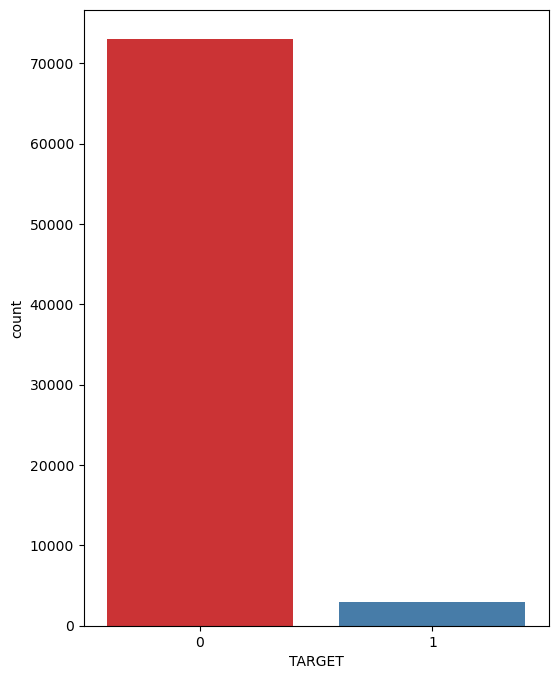

In [12]:
## Requirement 6:
## PUT YOUR CODE HERE:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="TARGET", data=train, palette="Set1")
plt.show()

In [13]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [14]:
train['TARGET'].value_counts()/len(train)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

**Kết quả của phân tích đơn biến**

- Số lượng nhãn trong biến TARGET là 2.

- Hai giá trị nhãn là 0 và 1.

- Trong tổng số giá trị của TARGET, No xuất hiện 96,04% lần và Yes xuất hiện 3,96% lần.

- Biểu đồ đơn biến xác nhận những phát hiện của chúng ta rằng

    - 0 có 73012 giá trị và

    - 1 có 3008 giá trị.
    
- Dữ liệu bị mất cân bằng, đòi hỏi phải có các kỹ thuật xử lý đặc biệt để mô hình không bị 'bias'

## 2.3 Phân tích biến phụ thuộc

- Xem các thuộc tính thống kê của tập dữ liệu

In [15]:
## Requirement 7:
## PUT YOUR CODE HERE:
train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- Tìm các dữ liệu ngoại lai

In [16]:
## Requirement 8:
## PUT YOUR CODE HERE:

for var in train.columns:
    IQR = train[var].quantile(0.75) - train[var].quantile(0.25)
    Lower_fence = train[var].quantile(0.25) - (IQR * 3)
    Upper_fence = train[var].quantile(0.75) + (IQR * 3)
    print('Dữ liệu ngoại lai của biến', var, 'là các giá trị < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Dữ liệu ngoại lai của biến var3 là các giá trị < 2.0 hoặc > 2.0
Dữ liệu ngoại lai của biến var15 là các giá trị < -28.0 hoặc > 91.0
Dữ liệu ngoại lai của biến imp_ent_var16_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var39_comer_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var39_comer_ult3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var40_comer_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var40_comer_ult3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var40_efect_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var40_efect_ult3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var40_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var41_comer_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var41_comer_ult3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến imp_op_var41_efect_ult

Dữ liệu ngoại lai của biến delta_imp_venta_var44_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_aport_var13_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_aport_var17_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_aport_var33_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_compra_var44_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_reemb_var13_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_reemb_var17_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_reemb_var33_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_trasp_var17_in_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_trasp_var17_out_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_trasp_var33_in_1y3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến delta_num_trasp_var33_out_1

Dữ liệu ngoại lai của biến num_trasp_var33_out_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến num_venta_var44_hace3 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến num_venta_var44_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến num_var45_hace2 là các giá trị < -9.0 hoặc > 12.0
Dữ liệu ngoại lai của biến num_var45_hace3 là các giá trị < -9.0 hoặc > 12.0
Dữ liệu ngoại lai của biến num_var45_ult1 là các giá trị < -9.0 hoặc > 12.0
Dữ liệu ngoại lai của biến num_var45_ult3 là các giá trị < -36.0 hoặc > 48.0
Dữ liệu ngoại lai của biến saldo_var2_ult1 là các giá trị < 0.0 hoặc > 0.0
Dữ liệu ngoại lai của biến saldo_medio_var5_hace2 là các giá trị < -270.0 hoặc > 360.0
Dữ liệu ngoại lai của biến saldo_medio_var5_hace3 là các giá trị < -36.6525 hoặc > 48.870000000000005
Dữ liệu ngoại lai của biến saldo_medio_var5_ult1 là các giá trị < -270.0 hoặc > 360.0
Dữ liệu ngoại lai của biến saldo_medio_var5_ult3 là các giá trị < -251.37 hoặc > 335.16
Dữ liệu ng

**Tóm tắt:**

- Một vài đặc trưng chỉ có một giá trị duy nhất là giá trị 0, điều này đòi hỏi chúng ta phải áp dụng kỹ thuật loại bỏ các đặc trưng bị trùng và quasi-constant để tránh trường hợp mô hình bị sai lệch trong quá trình huấn luyện.

- Một vài đặc trưng có giá trị nhỏ nhất và lớn nhất khá lớn, đòi hỏi phải áp dụng các kỹ thuật co dãn nhằm tránh hiện tượng 'bias'

- Không có dữ liệu bị khuyết

# 3.Lựa chọn đặc trưng

Ở bước này chúng ta sẽ thực hiện các phương pháp lựa chọn đặc trưng sau:

1. Loại các đặc trưng trùng.
2. Loại các đặc trưng quasi-constant.
3. Lựa chọn các đặc trưng bằng chỉ số ROC-AUC

## 3.1 Loại các đặc trưng bị trùng

- Đầu tiên là chúng ta sẽ loại bỏ các đặc trưng bị trùng

In [17]:
from feature_engine.selection import DropDuplicateFeatures

In [18]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:]
y_train = train.iloc[:,-1]

In [19]:
X_train.shape, X_test.shape

((76020, 369), (75818, 369))

In [20]:
## Requirement 9:
## PUT YOUR CODE HERE:

sel = DropDuplicateFeatures()

sel.fit(X_train)

X_train_dropduplicate = sel.transform(X_train)
X_test_dropduplicate = sel.transform(X_test)

In [21]:
# danh sách các đặc trưng trùng

## Requirement 10:
## PUT YOUR CODE HERE:

sel.features_to_drop_

{'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'ind_var13_medio',
 'ind_var18',
 'ind_var2',
 'ind_var25',
 'ind_var26',
 'ind_var27',
 'ind_var27_0',
 'ind_var28',
 'ind_var28_0',
 'ind_var29',
 'ind_var29_0',
 'ind_var32',
 'ind_var34',
 'ind_var37',
 'ind_var39',
 'ind_var41',
 'ind_var46',
 'ind_var46_0',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'num_var13_medio',
 'num_var18',
 'num_var25',
 'num_var26',
 'num_var27',
 'num_var27_0',
 'num_var28',
 'num_var28_0',
 'num_var29',
 'num_var29_0',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_var32',
 'num_var34',
 'num_var37',
 'n

In [22]:
X_train_dropduplicate.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


## 3.2 Loại bỏ các đặc trưng Quasi-constant

- Kế tiếp chúng ta sẽ loại các đặc trưng quasi-constant

In [23]:
from feature_engine.selection import DropConstantFeatures

In [24]:
## Requirement 11:
## PUT YOUR CODE HERE:

sel = DropConstantFeatures(tol=0.9)

sel.fit(X_train_dropduplicate)

X_train_dropconstant = sel.transform(X_train_dropduplicate)
X_test_dropconstant = sel.transform(X_test_dropduplicate)

In [25]:
# danh sách các đặc trưng quasi-constant

## Requirement 12:
## PUT YOUR CODE HERE:

sel.features_to_drop_

['var3',
 'imp_ent_var16_ult1',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_efect_ult1',
 'imp_op_var39_efect_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var5_0',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var25_0',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var40_0',
 'ind_var40',
 'ind_var44_0',
 'ind_var44',
 'num_var1_0',
 'num_var1',
 'num_var

In [26]:
X_train_dropconstant.head()

,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var5,...,num_var43_recib_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000
3,37,195.0,195.0,195.0,195.0,0.0,195.0,0.0,195.0,1,...,0,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,6,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016


## 3.3 Lựa chọn đặc trưng bằng phương pháp Extra Trees Classifier

- Chúng ta sẽ sử dụng phương pháp Extra Trees Classifier để lựa chọn các đặc trưng và loại bỏ các đặc trưng còn lại. Về cơ bản thì phương pháp này khá giống với mô hình Random Forest nhưng khác nhau ở chi tiết xây dựng các mô hình cơ sở trong một tập hợp các mô hình.

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

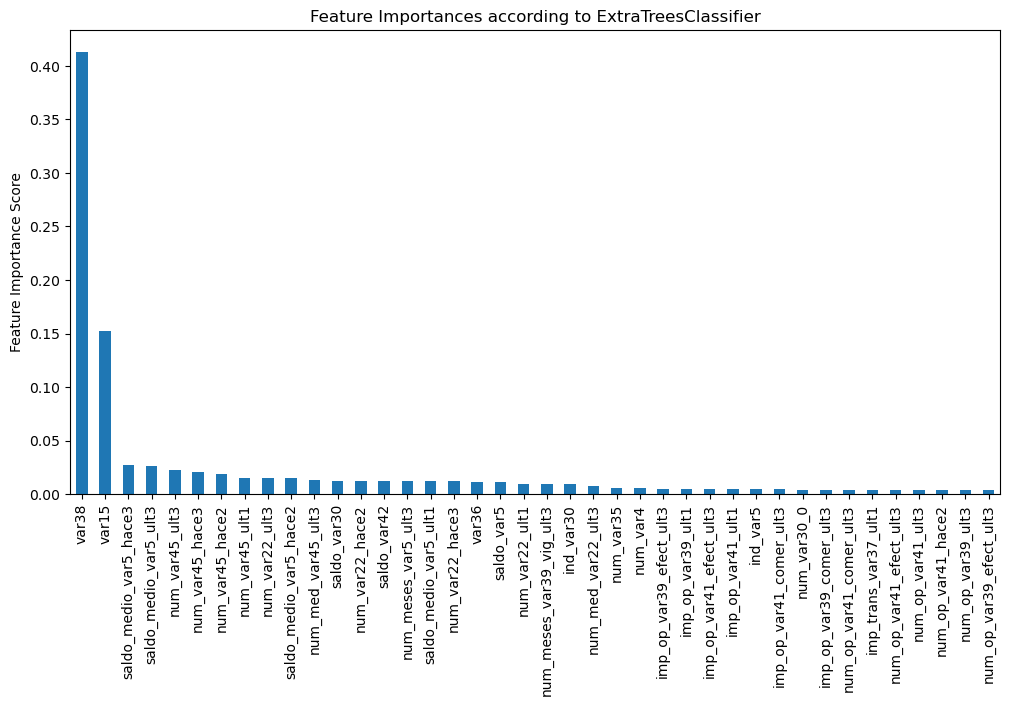

In [28]:
## Requirement 13:
## PUT YOUR CODE HERE:

## Feature selection
clf = ExtraTreesClassifier(random_state=1729)
selector = clf.fit(X_train_dropconstant, y_train)

# plot most important features
feat_imp = pd.Series(clf.feature_importances_, index = X_train_dropconstant.columns.values).sort_values(ascending=False)
feat_imp[:40].plot(kind='bar', title='Feature Importances according to ExtraTreesClassifier', figsize=(12, 8))
plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom=0.3)
# plt.savefig('1.png')
plt.show()

# clf.feature_importances_ 
fs = SelectFromModel(clf, prefit=True)

X_train_selected = fs.transform(X_train_dropconstant)
X_test_selected = fs.transform(X_test_dropconstant)

# 4.Co dãn các đặc trưng

- Như đã đề cập, miền giá trị của một vài đặc trưng là khá lớn, điều này thường không tốt cho mô hình của chúng ta. DO vậy, chúng ta sẽ co dãn các đặc trưng thành các giá trị nằm trong phân phối chuẩn

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
## Requirement 14:
## PUT YOUR CODE HERE:

scaler = StandardScaler()

scaler.fit(X_train_selected)

X_train_scale = scaler.transform(X_train_selected)
X_test_scale = scaler.transform(X_test_selected)

In [31]:
X_train_scale

array([[-7.88248631e-01, -3.72048308e-01, -3.73858948e-01, ...,
        -9.01413746e-02, -1.28067142e-01, -4.27182680e-01],
       [ 6.07525955e-02, -3.72048308e-01, -3.73858948e-01, ...,
        -8.11521737e-02, -1.28067142e-01, -3.72038298e-01],
       [-7.88248631e-01, -3.72048308e-01, -3.73858948e-01, ...,
        -9.01231717e-02, -1.27814392e-01, -2.73191237e-01],
       ...,
       [-7.88248631e-01, -3.72048308e-01, -3.73858948e-01, ...,
        -9.01413746e-02, -1.27700837e-01, -2.36542515e-01],
       [-6.33884772e-01, -3.72048308e-01, -3.73858948e-01, ...,
        -8.99654132e-02, -1.27752120e-01, -1.80428318e-01],
       [ 9.86935752e-01, -3.72048308e-01, -3.73858948e-01, ...,
        -9.01413746e-02, -1.28067142e-01,  4.11519699e-04]])

Sau khi xong bước này thì hầu như tập dữ liệu của chúng ta đã sẵn sàng cho việc training, nhưng vẫn còn khá nhiều cách nâng cao hơn để lựa chọn các đặc trưng phù hợp (như được mô tả trong hình dưới). Một trong số có thể kể đến như:

- Phương pháp đệ quy

- Sử dụng mô hình Decision Tree hay Random Forest

- Ma trận tương quan

- Các mô hình kiểm định giả thuyết như ANOVA

![FeatureSelection](images/feature_selection.png)

# 5.Huấn luyện mô hình

Do đầu ra của bài toán của chúng ta bị mất cân bằng (imbalanced data), mà các mô hình máy học lại thường 'ưa thích' các dữ liệu cân bằng, nên chúng ta phải tìm cách tạo ra một tập dữ liệu cân bằng từ tập dữ liệu gốc để mô hình cho ra dự đoán 'hợp lý' và 'có ý nghĩa' hơn

## 5.1 Lấy mẫu dữ liệu

Ở phần này chúng ta sẽ so sánh ba phương pháp lấy mẫu sau đây, rồi từ đó chọn ra phương pháp tốt nhất có thể cho việc cải tiến mô hình:

- Under-sampling

- Over-sampling

- Kết hợp 2 phương pháp under và over-sampling

Việc lấy mẫu được thực hiện bằng các hàm trong thư viện [imblearn](https://imbalanced-learn.org/stable/install.html)

### 5.1.1 Phương pháp under-sampling

Định nghĩa bộ tham số của các phương lấy mẫu, các phương pháp được sử dụng ở phần này bao gồm:

- [Random under-sampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler)

- [Edited Nearest Neighbour](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html#imblearn.under_sampling.EditedNearestNeighbours)

- [Tomek’s links](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html#imblearn.under_sampling.TomekLinks)

- [AllKNN](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.AllKNN.html#imblearn.under_sampling.AllKNN)

In [32]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks, AllKNN

In [33]:
## Requirement 15:
## PUT YOUR CODE HERE:

undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),

    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=4),

    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),

    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),
    
}

### 5.1.2 Phương pháp over-sampling

Định nghĩa bộ tham số của các phương lấy mẫu, các phương pháp được sử dụng ở phần này bao gồm:

- [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE)

- [Borderline SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html#imblearn.over_sampling.BorderlineSMOTE)

- [Adaptive Synthetic (ADASYN)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html#imblearn.over_sampling.ADASYN)

In [34]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.svm import SVC

In [35]:
## Requirement 16:
## PUT YOUR CODE HERE:

oversampler_dict = {

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'adasyn': ADASYN(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=5,
        n_jobs=4),

}

### 5.1.3 Kết hợp 2 phương pháp under và over-sampling

Định nghĩa bộ tham số của các phương lấy mẫu, các phương pháp được sử dụng ở phần này bao gồm:

- [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html#)

- [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

In [36]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [37]:
## Requirement 17:
## PUT YOUR CODE HERE:

under_oversampler_dict = {
    
    'smenn': SMOTEENN(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(
            sampling_strategy='auto', n_neighbors=3, kind_sel='all'),
        n_jobs=4),

    'smtomek': SMOTETomek(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        tomek=TomekLinks(sampling_strategy='all'),
        n_jobs=4),
    
}

## 5.2 Huấn luyện các mô hình cơ sở

Ở phần này chúng ta sẽ so sánh kết quả của một vài mô hình cơ sở để tìm ra phương pháp lấy mẫu nào là tốt nhất dựa trên các phương pháp đã liệt kê trước đó, việc so sánh được dựa trên chỉ số **ROC-AUC**

- Định nghĩa hàm số trả về kết quả so sánh của các phương pháp lấy mẫu, chúng ta cũng sẽ trả về kết quả của tập dữ liệu gốc để làm chuẩn so sánh

In [38]:
from sklearn.metrics import roc_auc_score

## Requirement 18:
## PUT YOUR CODE HERE:

def run_models(model, X_train, y_train, undersampler_dict, oversampler_dict, under_oversampler_dict):
    
    results_dict = {}
    clf = model
    
    # full data
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_train)
    roc = roc_auc_score(y_train, y_pred[:, 1])
    
    results_dict['full_data'] = roc
    
    # under-sampling
    for sampler in undersampler_dict.keys():
        
        # resample
        X_resampled, y_resampled = undersampler_dict[sampler].fit_resample(X_train, y_train)
        
        # evaluate performance
        clf.fit(X_resampled, y_resampled)
        y_pred = clf.predict_proba(X_resampled)
        roc = roc_auc_score(y_resampled, y_pred[:, 1])
        
        #store results
        results_dict[sampler] = roc
    
    # over-sampling
    for sampler in oversampler_dict.keys():

        # resample
        X_resampled, y_resampled = oversampler_dict[sampler].fit_resample(X_train, y_train)
        
        # evaluate performance
        clf.fit(X_resampled, y_resampled)
        y_pred = clf.predict_proba(X_resampled)
        roc = roc_auc_score(y_resampled, y_pred[:, 1])
        
        #store results
        results_dict[sampler] = roc
    
    # under + over-sampling
    for sampler in under_oversampler_dict.keys():

        # resample
        X_resampled, y_resampled = under_oversampler_dict[sampler].fit_resample(X_train, y_train)
        
        # evaluate performance
        clf.fit(X_resampled, y_resampled)
        y_pred = clf.predict_proba(X_resampled)
        roc = roc_auc_score(y_resampled, y_pred[:, 1])
        
        #store results
        results_dict[sampler] = roc
        
    return results_dict

<details><summary> Hint </summary>

Using ```roc_auc_score()```

</details>

Load các mô hình cơ bản

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

### 5.2.1 Logistic Regression

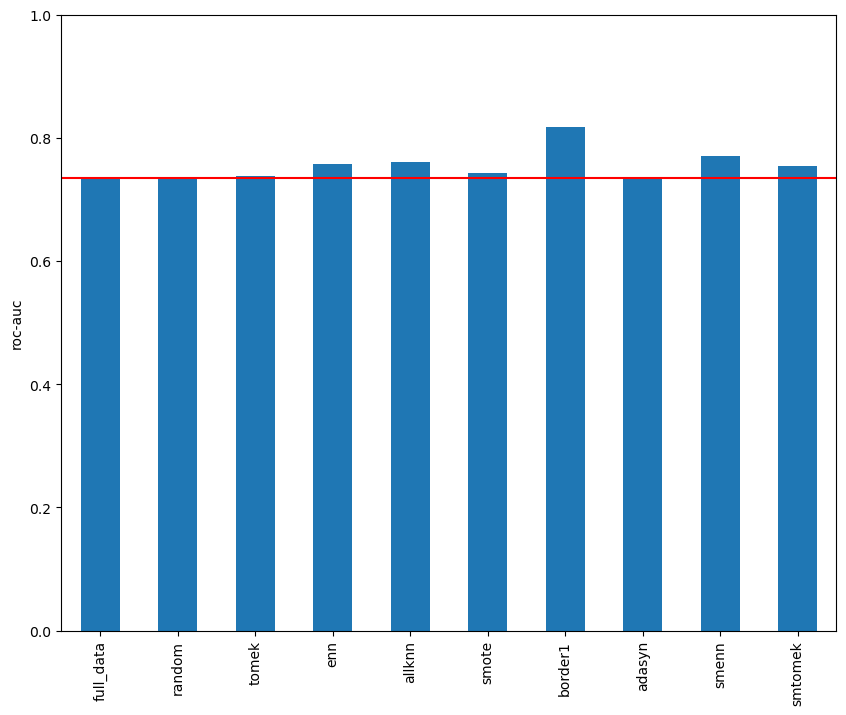

{'full_data': 0.7343989367894639, 'random': 0.734753644536555, 'tomek': 0.7385826983647616, 'enn': 0.757163989336626, 'allknn': 0.7613348008977443, 'smote': 0.743270032908887, 'border1': 0.8179468659798189, 'adasyn': 0.7336669005158041, 'smenn': 0.7702267273054354, 'smtomek': 0.7543454150766122}


In [40]:
## Requirement 19:
## PUT YOUR CODE HERE:

model = LogisticRegression()
results = run_models(model, X_train_scale, y_train, undersampler_dict, oversampler_dict, under_oversampler_dict)

plt.figure(figsize=(10, 8))
pd.Series(results).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0, 1)
plt.axhline(results['full_data'], color='r')
plt.show()

print(results)

### 5.2.2 K-Nearest Neighbors vote

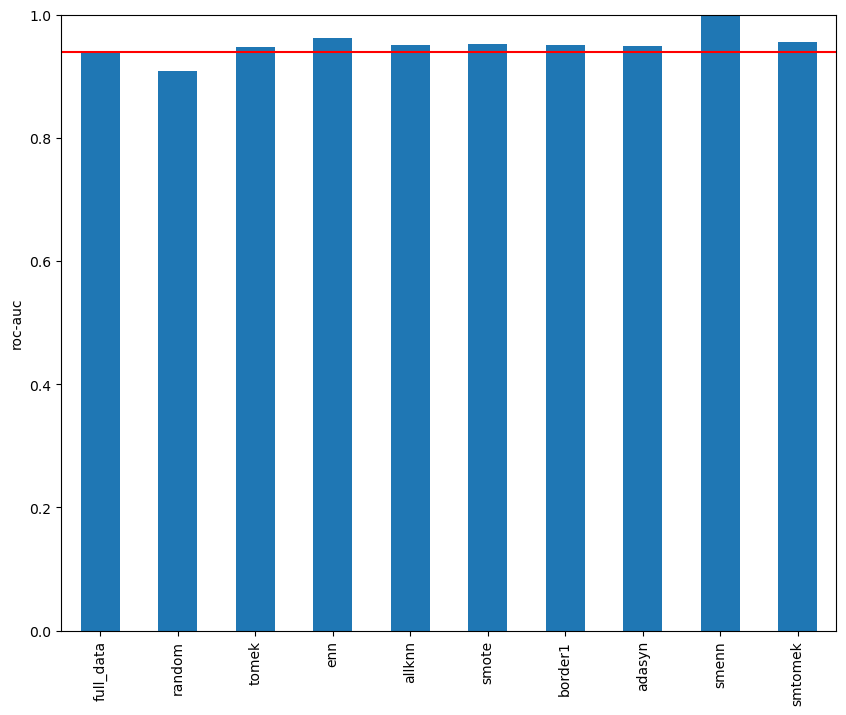

{'full_data': 0.9387398250659176, 'random': 0.9084937949156859, 'tomek': 0.9467489579392894, 'enn': 0.9618732444632542, 'allknn': 0.9498622126552779, 'smote': 0.9519115380765675, 'border1': 0.9497696210090386, 'adasyn': 0.9495954081198597, 'smenn': 0.9997467130636982, 'smtomek': 0.9560200030129373}


In [41]:
## Requirement 20:
## PUT YOUR CODE HERE:

model = KNeighborsClassifier(n_neighbors=2)
results = run_models(model, X_train_scale, y_train, undersampler_dict, oversampler_dict, under_oversampler_dict)

plt.figure(figsize=(10, 8))
pd.Series(results).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0, 1)
plt.axhline(results['full_data'], color='r')
plt.show()

print(results)

### 5.2.3 Decision Tree

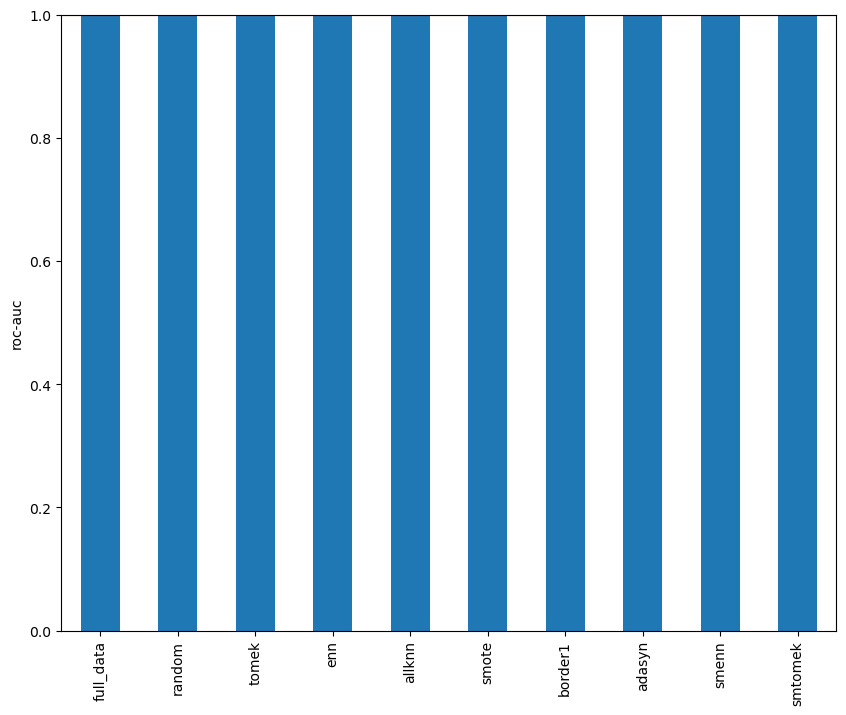

{'full_data': 0.9988013983929777, 'random': 0.9992991870968198, 'tomek': 0.9987768044765191, 'enn': 0.9993333065584151, 'allknn': 0.9988938154667347, 'smote': 0.9991835857525474, 'border1': 0.9993537320987851, 'adasyn': 0.9991376254442044, 'smenn': 0.9999999827672423, 'smtomek': 0.9990894561134923}


In [42]:
## Requirement 21:
## PUT YOUR CODE HERE:

model = DecisionTreeClassifier()
results = run_models(model, X_train_scale, y_train, undersampler_dict, oversampler_dict, under_oversampler_dict)

plt.figure(figsize=(10, 8))
pd.Series(results).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0, 1)
plt.axhline(results['full_data'], color='r')
plt.show()

print(results)

### 5.2.4 Random Forest

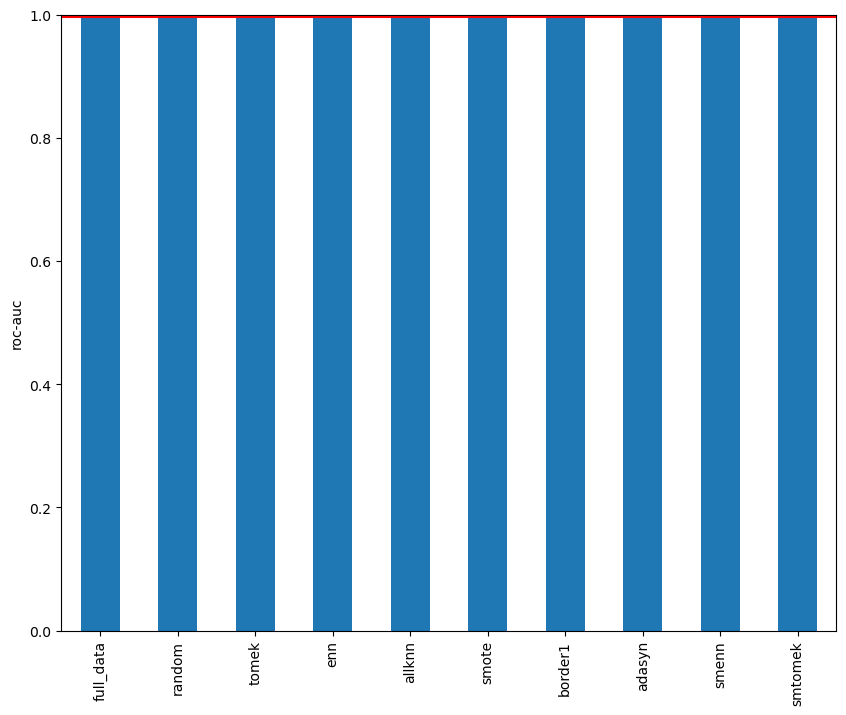

{'full_data': 0.9962016044287677, 'random': 0.9961681858130093, 'tomek': 0.9964213502522477, 'enn': 0.9973945239104064, 'allknn': 0.9968591549697725, 'smote': 0.9979463338935537, 'border1': 0.9981506436176936, 'adasyn': 0.9980144163875693, 'smenn': 0.999994777660285, 'smtomek': 0.9982784487686104}


In [43]:
## Requirement 22:
## PUT YOUR CODE HERE:

model = RandomForestClassifier()
results = run_models(model, X_train_scale, y_train, undersampler_dict, oversampler_dict, under_oversampler_dict)

plt.figure(figsize=(10, 8))
pd.Series(results).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0, 1)
plt.axhline(results['full_data'], color='r')
plt.show()

print(results)

### 5.2.5 Neural Network

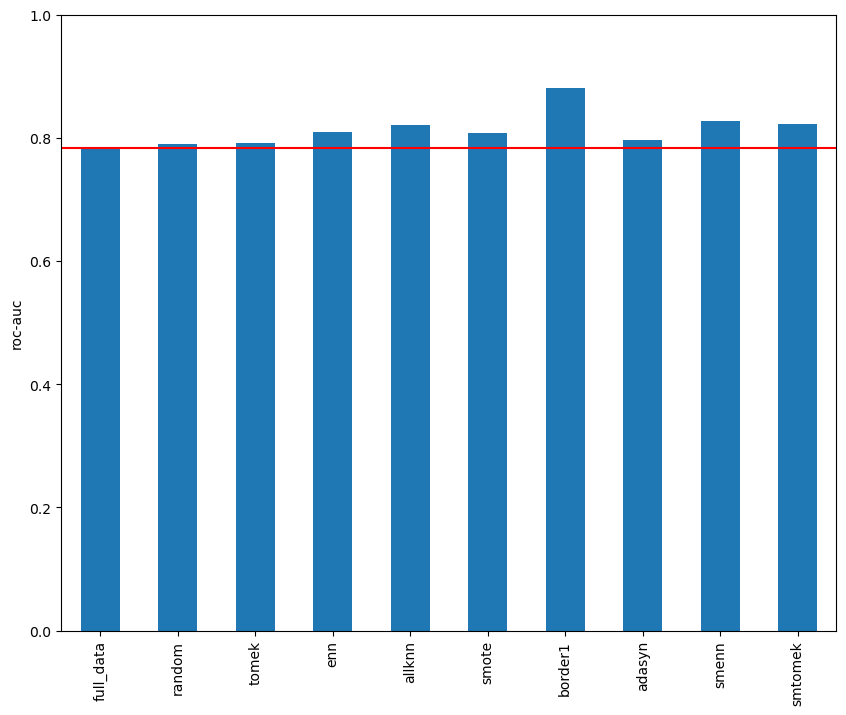

{'full_data': 0.7834738538680905, 'random': 0.7895298928035874, 'tomek': 0.7910324926886236, 'enn': 0.8084893108823621, 'allknn': 0.8201657571732366, 'smote': 0.807537950689609, 'border1': 0.8801997803970681, 'adasyn': 0.7961012782889719, 'smenn': 0.8277147490164131, 'smtomek': 0.8226122877507053}


In [45]:
## Requirement 23:
## PUT YOUR CODE HERE:

model = MLPClassifier(hidden_layer_sizes=(10, 5, ), activation='logistic', max_iter=300)
results = run_models(model, X_train_scale, y_train, undersampler_dict, oversampler_dict, under_oversampler_dict)

plt.figure(figsize=(10, 8))
pd.Series(results).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0, 1)
plt.axhline(results['full_data'], color='r')
plt.show()

print(results)

### Kết quả (1)

| Model | Phương pháp lấy mẫu có ROC-AUC cao nhất |
| --- | ----------- |
| Logistic Regression | Borderline |
| KNN | SMENN  |
| Decision Tree | SMENN  |
| Random Forest | SMENN  |
| Neural Network | Borderline  |

**Kết quả:**

- Dựa trên các kết quả thu được, có thể thấy rõ ràng phương pháp lấy mẫu có cho ra kết quả tốt hay không còn phụ thuộc vào việc mô hình chúng ta đang sử dụng là mô hình nào, không có một phương pháp lấy mẫu nào là tốt nhất cho tất cả các mô hình.

## 5.3 Các phương pháp kết hợp mô hình

Ở phần này chúng ta sẽ thực hiện các phương pháp kết hợp mô hình để cải thiện kết quả.

- Thực hiện việc lấy mẫu dữ liệu với phương pháp **Borderline SMOTE** (do cách lấy mẫu này cho ra kết quả khá tốt trên các mô hình đơn lẻ ở phần trước)

In [44]:
## Requirement 24:
## PUT YOUR CODE HERE:

sampler = BorderlineSMOTE(
            sampling_strategy='auto',
            random_state=0,
            k_neighbors=5,
            m_neighbors=10,
            kind='borderline-1',
            n_jobs=4)

X_resampled, y_resampled = sampler.fit_resample(X_train_scale, y_train)

- Định nghĩa các mô hình ensemble

In [47]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 1.9 MB/s eta 0:00:00


In [61]:
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB

### 5.3.2 Bagging

Các mô hình được sử dụng ở phần này là:

- Bagging với Decision Tree

In [49]:
## Requirement 25:
## PUT YOUR CODE HERE:

model = BaggingClassifier(base_estimator=DecisionTreeClassifier())

model.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_resampled)
roc_auc_score(y_resampled, y_pred[:, 1])

0.9978456299055423

- Lưu kết quả dự đoán trên tập test của mô hình này vào file CSV để submit kết quả lên Kaggle

In [50]:
probs = model.predict_proba(X_test_scale)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("bagging_gaussian_submission.csv", index=False)

- Bagging với Logistic Regression

In [52]:
## Requirement 26:
## PUT YOUR CODE HERE:

model = BaggingClassifier(base_estimator=LogisticRegression())

model.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_resampled)
roc_auc_score(y_resampled, y_pred[:, 1])

0.8179431469924293

Lưu kết quả dự đoán trên tập test của mô hình này vào file CSV để submit kết quả lên Kaggle

In [53]:
## Requirement 27:
## PUT YOUR CODE HERE:

probs = model.predict_proba(X_test_scale)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("bagging_logistic_submission.csv", index=False)

### 5.3.2 Boosting

Các mô hình được sử dụng ở phần này là:

- AdaBoost

- GradientBoost

- XGBoost

- AdaBoost

In [54]:
## Requirement 28:
## PUT YOUR CODE HERE:

model = AdaBoostClassifier()

model.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_resampled)
roc_auc_score(y_resampled, y_pred[:, 1])

0.8968799621234087

- Lưu kết quả dự đoán trên tập test của mô hình này vào file CSV để submit kết quả lên Kaggle

In [55]:
## Requirement 29:
## PUT YOUR CODE HERE:

probs = model.predict_proba(X_test_scale)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("adaboost_submission.csv", index=False)

- GradientBoosting

In [56]:
## Requirement 30:
## PUT YOUR CODE HERE:

model = GradientBoostingClassifier()

model.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_resampled)
roc_auc_score(y_resampled, y_pred[:, 1])

0.9200502740537846

- Lưu kết quả dự đoán trên tập test của mô hình này vào file CSV để submit kết quả lên Kaggle

In [57]:
## Requirement 31:
## PUT YOUR CODE HERE:

probs = model.predict_proba(X_test_scale)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("gradientboost_submission.csv", index=False)

- XGBoost

In [58]:
## Requirement 32:
## PUT YOUR CODE HERE:

model= XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, 
                     learning_rate=0.03, nthread=4, subsample=0.95, 
                     colsample_bytree=0.85, seed=0)
model.fit(X_resampled, y_resampled, eval_metric="auc", verbose = False)
#            eval_set=[(X_test, y_test)])
y_pred = model.predict_proba(X_resampled)
roc_auc_score(y_resampled, y_pred[:, 1])

0.9369055476761254

- Lưu kết quả dự đoán trên tập test của mô hình này vào file CSV để submit kết quả lên Kaggle

In [59]:
## Requirement 33:
## PUT YOUR CODE HERE:
probs = model.predict_proba(X_test_scale)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("xgboost_submission.csv", index=False)

### 5.3.3 Stacking
Phương pháp stacking ở [đây](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

In [62]:
## Requirement 34:
## PUT YOUR CODE HERE:

estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GaussianNB()),
    ('kn', KNeighborsClassifier(n_neighbors=2))
]

model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

model.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_resampled)
roc_auc_score(y_resampled, y_pred[:, 1])

0.9986686596359601

Lưu kết quả dự đoán trên tập test của mô hình này vào file CSV để submit kết quả lên Kaggle

In [63]:
## Requirement 35:
## PUT YOUR CODE HERE:

probs = model.predict_proba(X_test_scale)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("stacking_submission.csv", index=False)

### 5.3.4 Average

Chúng ta sẽ lấy trung bình trọng số của dự đoán của tập hợp các mô hình khác nhau.

- Mô hình 1: [RUSBoostClassifier()](https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.RUSBoostClassifier.html) 

In [64]:
from imblearn.ensemble import RUSBoostClassifier

In [66]:
## Requirement 36:
## PUT YOUR CODE HERE:

model_1 = RUSBoostClassifier(
              estimator=None,
              n_estimators=20,
              learning_rate=1.0,
              sampling_strategy='auto',
              random_state=2909,
          )

model_1.fit(X_train_scale, y_train)
y_pred = model_1.predict_proba(X_train_scale)
roc_auc_score(y_train, y_pred[:, 1])

0.8077916285037959

In [67]:
probs_1 = model_1.predict_proba(X_test_scale)

- Mô hình 2: [EasyEnsembleClassifier()](https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.EasyEnsembleClassifier.html)

In [68]:
from imblearn.ensemble import EasyEnsembleClassifier

In [69]:
## Requirement 37:
## PUT YOUR CODE HERE:

model_2 = EasyEnsembleClassifier(
            n_estimators=20,
            sampling_strategy='auto',
            n_jobs=4,
            random_state=2909,
          )

model_2.fit(X_train_scale, y_train)
y_pred = model_2.predict_proba(X_train_scale)
roc_auc_score(y_train, y_pred[:, 1])

0.8166564456833678

In [70]:
probs_2 = model_2.predict_proba(X_test_scale)

- Mô hình 3: [XGBClassifier()](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier)

In [71]:
## Requirement 38:
## PUT YOUR CODE HERE:

model_3 = XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, 
                     learning_rate=0.03, nthread=4, subsample=0.95, 
                     colsample_bytree=0.85, seed=0)

model_3.fit(X_train_scale, y_train, eval_metric="auc", verbose = False)
y_pred = model_3.predict_proba(X_train_scale)
roc_auc_score(y_train, y_pred[:, 1])

0.8577663061398534

In [72]:
probs_3 = model_3.predict_proba(X_test_scale)

- Lấy trung bình kết quả đầu ra

In [73]:
## Requirement 39:
## PUT YOUR CODE HERE:

probs = (0.1*probs_1 + 0.1*probs_2 + 0.8*probs_3)
submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("average_submission.csv", index=False)

### Kết quả (2)

| Model | ROC-AUC |
| --- | ----------- |
| Bagging với Decision Tree | x |
| Bagging với Logistic Regression |   |
| AdaBoost |   |
| Gradient Boosting |   |
| XGBoost |   |
| Stacking |   |
| Average Ensemble |   |

# 6.Save mô hình và submit lên Kaggle

- Việc tìm kiếm bộ tham số tối ưu cho mạng Neural mất rất nhiều thời gian, cho nên chúng ta sẽ lưu mô hình đã được tối ưu lại và tái sử dụng nó để tạo ra kết quả submit lên Kaggle

In [74]:
from joblib import dump, load

- Gọi lại mô hình XGBoost ở phần trước

In [75]:
model_3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

- Lưu mô hình

In [76]:
## Requirement 40:
## PUT YOUR CODE HERE:

dump(model_3, 'xgboost.joblib') 

['xgboost.joblib']

- Load mô hình

In [77]:
## Requirement 41:
## PUT YOUR CODE HERE:

model_load = load('xgboost.joblib')

In [78]:
## Requirement 42:
## PUT YOUR CODE HERE:

probs = model_load.predict_proba(X_train_scale)

roc_auc_score(y_train, probs[:, 1])

0.8577663061398534

- Kế tiếp chúng ta sẽ submit các kết quả thu được ở trên lên Kaggle, kết quả trên kaggle cho ra mức **~top 60%**. 

Dựa vào kết quả submit chúng ta có thể thấy rằng:

- Các mô hình cho ra kết quả rất tốt trên tập huấn luyện nhưng đôi khi lại cho ra kết quả không tốt trong thực tế, đó là hiện tượng **Quá Khớp (Overfitting)**

- Việc xác định mô hình nào tốt hơn phụ thuộc vào rất nhiều yếu tố, trong đó có sự ảnh hưởng của việc xử lý dữ liệu trước khi đưa vào huấn luyện

- Đối với bài toán này, các mô hình Boosting cho ra kết quả vượt trội hơn so với các phương pháp kết hợp mô hình khác. 

# 7.Phần Nâng cao - Cải tiến mô hình


- Thay đổi phương pháp lựa chọn đặc trưng để chọn ra bộ đặc trưng tốt hơn

- Sử dụng phương pháp khác để xử lý vấn đề mất cân bằng dữ liệu

- Sử dụng các mô hình học máy khác hoặc các kỹ thuật kết hợp mô hình nâng cao 

- Tập trung vào việc cải tiến các mô hình Boosting

- Tinh chỉnh các tham số của mô hình

- Sử dụng các kỹ thuật K-Fold hoặc chia nhỏ tập train để tránh hiện tượng Overfitting

## 7.1 Kết quả submit trên Kaggle

![Submission](images/submissions.png)